## spherical harmonics

https://github.com/stephaniedurand/SeisTomoPy_V3

https://scipython.com/blog/visualizing-the-real-forms-of-the-spherical-harmonics/

https://github.com/SHTOOLS/SHTOOLS and https://shtools.github.io/SHTOOLS/index.html

https://docs.scipy.org/doc/scipy/reference/generated/scipy.special.sph_harm.html

https://igppweb.ucsd.edu/~guy/sio227b/

https://jcgt.org/published/0002/02/06/paper.pdf

https://academic.oup.com/gji/article/223/1/1/5841525

https://www.tacc.utexas.edu/-/planet-scale-mri
http://ds.iris.edu/ds/products/emc-glad-m25/ and https://github.com/caiociardelli/gladm25 and https://github.com/caiociardelli/sphglltools 

https://dpotoyan.github.io/Chem324/SphHarm_visualize.html


https://scipython.com/book/chapter-8-scipy/examples/visualizing-the-spherical-harmonics/


https://stackoverflow.com/a/49161178/9357244

http://www-gpsg.mit.edu/12.201_12.501/BOOK/chapter2.pdf



In [1]:
from scipy.special import sph_harm

In [2]:
sph_harm?

Call signature:  sph_harm(*args, **kwargs)
Type:            ufunc
String form:     <ufunc 'sph_harm'>
File:            ~/miniconda3/envs/yt_dev/lib/python3.7/site-packages/numpy/__init__.py
Docstring:      
sph_harm(x1, x2, x3, x4, /, out=None, *, where=True, casting='same_kind', order='K', dtype=None, subok=True[, signature, extobj])

sph_harm(m, n, theta, phi)

Compute spherical harmonics.

The spherical harmonics are defined as

.. math::

    Y^m_n(\theta,\phi) = \sqrt{\frac{2n+1}{4\pi} \frac{(n-m)!}{(n+m)!}}
      e^{i m \theta} P^m_n(\cos(\phi))

where :math:`P_n^m` are the associated Legendre functions; see `lpmv`.

Parameters
----------
m : array_like
    Order of the harmonic (int); must have ``|m| <= n``.
n : array_like
   Degree of the harmonic (int); must have ``n >= 0``. This is
   often denoted by ``l`` (lower case L) in descriptions of
   spherical harmonics.
theta : array_like
   Azimuthal (longitudinal) coordinate; must be in ``[0, 2*pi]``.
phi : array_like
   Polar (c

In [3]:
import numpy as np

In [7]:
theta = np.linspace(0, 2*np.pi)
phi = np.linspace(0, np.pi)
theta, phi = np.meshgrid(theta, phi)

In [50]:
m_order = 0
n_degree = 1
y_mn = sph_harm(m_order, n_degree, theta, phi) # y_n^mcos(phi)

In [51]:
y_mn

array([[ 0.48860251+0.j,  0.48860251+0.j,  0.48860251+0.j, ...,
         0.48860251+0.j,  0.48860251+0.j,  0.48860251+0.j],
       [ 0.48759863+0.j,  0.48759863+0.j,  0.48759863+0.j, ...,
         0.48759863+0.j,  0.48759863+0.j,  0.48759863+0.j],
       [ 0.48459109+0.j,  0.48459109+0.j,  0.48459109+0.j, ...,
         0.48459109+0.j,  0.48459109+0.j,  0.48459109+0.j],
       ...,
       [-0.48459109+0.j, -0.48459109+0.j, -0.48459109+0.j, ...,
        -0.48459109+0.j, -0.48459109+0.j, -0.48459109+0.j],
       [-0.48759863+0.j, -0.48759863+0.j, -0.48759863+0.j, ...,
        -0.48759863+0.j, -0.48759863+0.j, -0.48759863+0.j],
       [-0.48860251+0.j, -0.48860251+0.j, -0.48860251+0.j, ...,
        -0.48860251+0.j, -0.48860251+0.j, -0.48860251+0.j]])

In [53]:
def sph2cart(theta, phi, r):
    z = r * np.cos(phi)
    rsin = r * np.sin(phi)
    x = rsin * np.cos(theta)
    y = rsin * np.sin(theta)
    
    return x, y, z

plot this degree, order with value as radius:

In [66]:
R = np.abs(y_mn)
x,y,z = sph2cart(theta, phi, R)

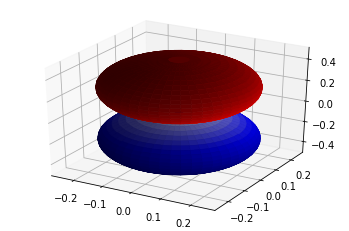

In [64]:
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

fcolors = np.real((y_mn - y_mn.min())/(y_mn.max() - y_mn.min()))

ax.plot_surface(x, y, z, linewidth = 0.5, facecolors = cm.seismic(fcolors), edgecolors = 'k')

plot on a unit sphere

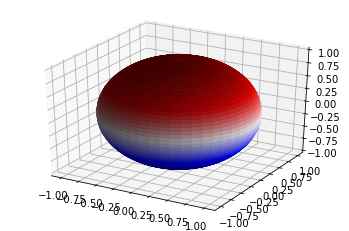

In [65]:
x,y,z = sph2cart(theta, phi, 1.)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

fcolors = np.real((y_mn - y_mn.min())/(y_mn.max() - y_mn.min()))

ax.plot_surface(x, y, z, linewidth = 0.5, facecolors = cm.seismic(fcolors), edgecolors = 'k')

superposition of the different degrees